## Summary

The task is to predict customer churn for a telecom company by analyzing their usage patterns and service interactions. The goal is to build a machine learning model that identifies key factors contributing to customer churn and provides actionable insights to reduce future churn rates.

**Objectives:**
* **Understand the customer usage patterns:** Analyze the dataset to discover how customers engage with various services (e.g., calls, internet usage, recharges).
* **Identify churners:** Define churn based on customer inactivity (e.g., no calls or internet usage in the last month).
* **Feature Engineering:** Create relevant features that highlight customer behavior, such as monthly usage, recharge amounts, and service engagement.
* **Model Training and Prediction:** Train machine learning models to predict churn, evaluate their performance, and select the most effective model.
* **Feature Importance:** Identify the most important features contributing to churn using methods like logistic regression or decision trees.
* **Provide Recommendations:** Based on the analysis, offer strategies that can help reduce customer churn and retain high-value customers.

**Expected Outcomes:**
* A machine learning model capable of predicting customer churn with good accuracy.
* Insights into the key factors driving customer churn.
* Visualizations and tables that highlight the most significant features.
* Strategic recommendations for the business to minimize churn and retain customers.

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import os

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

##### Importing the data set

In [3]:
telecom_data=pd.read_csv("telecom_churn_data.csv")

In [4]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
telecom_data.shape

(99999, 226)

###### Reading the data dictionary

In [6]:
col=list(telecom_data.columns)
col

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [7]:
telecom_data_dictionary=pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [8]:
telecom_data_dictionary

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


#### Data Preparation

##### Filtering  High Value customers since the objective is to predict churn only for the high value customers

##### High Value Customers are defined customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

##### Data Cleaning

#### $ Checking for the duplicated date

In [9]:
duplicated=telecom_data[telecom_data.duplicated()]
duplicated

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


##### There are no duplicated values

##### Checking for data variance in each column and droppin the columns that doesn't have any variance

In [10]:
telecom_data.nunique()

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

In [11]:
col_to_drop=[col for col in telecom_data.columns if telecom_data[col].nunique()==1]
col_to_drop

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [12]:
telecom_data.shape

(99999, 226)

In [13]:
telecom_data.drop(col_to_drop,axis=1,inplace=True)
telecom_data.shape

(99999, 210)

##### Checking for the data types of the columns

In [14]:
telecom_data.dtypes

mobile_number                 int64
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2t_mou_9            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            

##### Observation:We can see the date_* column has data type object. We shall convert this to datetime format

In [15]:
date_col= telecom_data.select_dtypes(include=['object']).columns
date_col

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

In [16]:
telecom_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.

In [17]:
for i in date_col:
    telecom_data[i] = pd.to_datetime(telecom_data[i])
telecom_data.filter(like='date').dtypes

date_of_last_rech_6         datetime64[ns]
date_of_last_rech_7         datetime64[ns]
date_of_last_rech_8         datetime64[ns]
date_of_last_rech_9         datetime64[ns]
date_of_last_rech_data_6    datetime64[ns]
date_of_last_rech_data_7    datetime64[ns]
date_of_last_rech_data_8    datetime64[ns]
date_of_last_rech_data_9    datetime64[ns]
dtype: object

##### Handling missing values

In [18]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

max_rech_data_6             74.846748
fb_user_6                   74.846748
count_rech_3g_6             74.846748
count_rech_2g_6             74.846748
night_pck_user_6            74.846748
arpu_3g_6                   74.846748
total_rech_data_6           74.846748
av_rech_amt_data_6          74.846748
arpu_2g_6                   74.846748
date_of_last_rech_data_6    74.846748
arpu_3g_7                   74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
count_rech_2g_7             74.428744
count_rech_3g_9             74.077741
date_of_last_rech_data_9    74.077741
count_rech_2g_9             74.077741
fb_user_9                   74.077741
total_rech_data_9           74.077741
max_rech_data_9             74.077741
night_pck_us

###### Handling missing values related to recharge columns

In [19]:
telecom_data[['date_of_last_rech_data_6','av_rech_amt_data_6','total_rech_data_6']].head(10)

,date_of_last_rech_data_6,av_rech_amt_data_6,total_rech_data_6
0,2014-06-21,252.0,1.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,56.0,1.0
5,NaT,NaN,NaN
6,NaT,NaN,NaN
7,NaT,NaN,NaN
8,NaT,NaN,NaN
9,NaT,NaN,NaN


##### Observation: From the above , we can understand that date_of_last_rech_data_6 indicating the date of last recharge is null then 
##### columns 'av_rech_amt_data_6' and 'total_rech_data_6' having null values indicate a meaningful missing. So we can replace those null values with zer0

In [20]:
result = telecom_data[(telecom_data['date_of_last_rech_data_6'].isnull()) & (telecom_data['av_rech_amt_data_6'].notna() | telecom_data['total_rech_data_6'].notna()| telecom_data['max_rech_data_6'].notna())]
result

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


##### This proves that if date_of_last_rech_data_* is null then  av_rech_amt_data_* , total_rech_data_* ,max_rech_data_6 are null. 

In [21]:
result = telecom_data[(telecom_data['av_rech_amt_data_6'].isnull() & telecom_data['total_rech_data_6'].notna())]
result

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


In [22]:
result = telecom_data[(telecom_data['max_rech_data_6'].isnull() & telecom_data['total_rech_data_6'].notna())]
result

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


In [23]:
result = telecom_data[(telecom_data['av_rech_amt_data_6'].isnull() & telecom_data['total_rech_data_6'].notna())]
result

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


##### This proves that if av_rech_amt_data_* is null then both total_rech_data_*  and max_rech_data_* are also null and vice versa. And if max_rech_data_* is null then both av_rech_amt_data_*  and total_rech_data_* are null and vice versa. So now we can impute those columns of all months(6,7,8,9) with zero in recharge columns

In [24]:
recharge_col=['av_rech_amt_data_6','total_rech_data_6','max_rech_data_6','av_rech_amt_data_7','total_rech_data_7','max_rech_data_7','av_rech_amt_data_8','total_rech_data_8','max_rech_data_8','av_rech_amt_data_9','total_rech_data_9','max_rech_data_9']
recharge_col

['av_rech_amt_data_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'av_rech_amt_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'av_rech_amt_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_9',
 'total_rech_data_9',
 'max_rech_data_9']

In [25]:
telecom_data[recharge_col].isnull().mean()*100

av_rech_amt_data_6    74.846748
total_rech_data_6     74.846748
max_rech_data_6       74.846748
av_rech_amt_data_7    74.428744
total_rech_data_7     74.428744
max_rech_data_7       74.428744
av_rech_amt_data_8    73.660737
total_rech_data_8     73.660737
max_rech_data_8       73.660737
av_rech_amt_data_9    74.077741
total_rech_data_9     74.077741
max_rech_data_9       74.077741
dtype: float64

In [26]:
telecom_data[recharge_col]=telecom_data[recharge_col].apply(lambda x:x.fillna(0))

In [27]:
telecom_data[recharge_col].isnull().mean()*100

av_rech_amt_data_6    0.0
total_rech_data_6     0.0
max_rech_data_6       0.0
av_rech_amt_data_7    0.0
total_rech_data_7     0.0
max_rech_data_7       0.0
av_rech_amt_data_8    0.0
total_rech_data_8     0.0
max_rech_data_8       0.0
av_rech_amt_data_9    0.0
total_rech_data_9     0.0
max_rech_data_9       0.0
dtype: float64

##### Handling the count_rech_* columns

In [28]:
telecom_data[['count_rech_3g_6','count_rech_2g_6','total_rech_data_6']].head(100)

,count_rech_3g_6,count_rech_2g_6,total_rech_data_6
0,1.0,0.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,0.0,1.0,1.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


##### From the above result we can clearly see (total_rech_data_*)=(count_rech_3g_*)+(count_rech_2g_6). This leads to multicollinearity. So we can drop the count_rech* columms

In [29]:
telecom_data.shape

(99999, 210)

In [30]:
telecom_data.drop(['count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9'],axis=1,inplace=True)

In [31]:
telecom_data.shape

(99999, 202)

In [32]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

fb_user_6                   74.846748
arpu_3g_6                   74.846748
date_of_last_rech_data_6    74.846748
night_pck_user_6            74.846748
arpu_2g_6                   74.846748
arpu_2g_7                   74.428744
night_pck_user_7            74.428744
date_of_last_rech_data_7    74.428744
fb_user_7                   74.428744
arpu_3g_7                   74.428744
fb_user_9                   74.077741
arpu_3g_9                   74.077741
arpu_2g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_user_9            74.077741
night_pck_user_8            73.660737
fb_user_8                   73.660737
date_of_last_rech_data_8    73.660737
arpu_2g_8                   73.660737
arpu_3g_8                   73.660737
std_ic_t2m_mou_9             7.745077
spl_ic_mou_9                 7.745077
std_og_t2t_mou_9             7.745077
isd_og_mou_9                 7.745077
std_og_t2m_mou_9             7.745077
spl_og_mou_9                 7.745077
loc_og_mou_9

In [33]:
telecom_data['fb_user_6'].value_counts(normalize=True)*100

fb_user_6
1.0    91.440385
0.0     8.559615
Name: proportion, dtype: float64

In [34]:
telecom_data['fb_user_7'].value_counts(normalize=True)*100

fb_user_7
1.0    90.876383
0.0     9.123617
Name: proportion, dtype: float64

In [35]:
telecom_data['fb_user_8'].value_counts(normalize=True)*100

fb_user_8
1.0    89.080831
0.0    10.919169
Name: proportion, dtype: float64

In [36]:
telecom_data['fb_user_9'].value_counts(normalize=True)*100

fb_user_9
1.0    86.096752
0.0    13.903248
Name: proportion, dtype: float64

In [37]:
telecom_data['night_pck_user_6'].value_counts(normalize=True)*100

night_pck_user_6
0.0    97.491353
1.0     2.508647
Name: proportion, dtype: float64

In [38]:
telecom_data['night_pck_user_7'].value_counts(normalize=True)*100

night_pck_user_7
0.0    97.696609
1.0     2.303391
Name: proportion, dtype: float64

In [39]:
telecom_data['night_pck_user_8'].value_counts(normalize=True)*100

night_pck_user_8
0.0    97.915638
1.0     2.084362
Name: proportion, dtype: float64

In [40]:
telecom_data['night_pck_user_9'].value_counts(normalize=True)*100

night_pck_user_9
0.0    98.402901
1.0     1.597099
Name: proportion, dtype: float64

##### A rule of thumb where if one category constitutes less than 5% or 1% of the total instances, we can drop these columns since those columns are highly biased

In [41]:
col_drop=['fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9']
col_drop

['fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9']

In [42]:
telecom_data.shape

(99999, 202)

In [43]:
telecom_data.drop(col_drop,axis=1,inplace=True)

In [44]:
telecom_data.shape

(99999, 194)

In [45]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

date_of_last_rech_data_6    74.846748
arpu_2g_6                   74.846748
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_2g_7                   74.428744
date_of_last_rech_data_7    74.428744
arpu_3g_9                   74.077741
arpu_2g_9                   74.077741
date_of_last_rech_data_9    74.077741
date_of_last_rech_data_8    73.660737
arpu_3g_8                   73.660737
arpu_2g_8                   73.660737
loc_og_t2f_mou_9             7.745077
isd_og_mou_9                 7.745077
std_ic_t2t_mou_9             7.745077
loc_og_t2c_mou_9             7.745077
spl_ic_mou_9                 7.745077
loc_ic_t2t_mou_9             7.745077
ic_others_9                  7.745077
std_ic_mou_9                 7.745077
loc_og_mou_9                 7.745077
std_og_mou_9                 7.745077
spl_og_mou_9                 7.745077
std_og_t2t_mou_9             7.745077
std_ic_t2m_mou_9             7.745077
std_og_t2f_mou_9             7.745077
std_og_t2m_m

In [46]:
date_col

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

##### We can drop the date* columns as those columns have no more significance

In [47]:
telecom_data.shape

(99999, 194)

In [48]:
telecom_data.drop(date_col,axis=1,inplace=True)

In [49]:
telecom_data.shape

(99999, 186)

In [50]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

arpu_3g_6             74.846748
arpu_2g_6             74.846748
arpu_3g_7             74.428744
arpu_2g_7             74.428744
arpu_2g_9             74.077741
arpu_3g_9             74.077741
arpu_3g_8             73.660737
arpu_2g_8             73.660737
std_og_t2f_mou_9       7.745077
std_ic_mou_9           7.745077
std_ic_t2f_mou_9       7.745077
loc_og_mou_9           7.745077
std_og_t2t_mou_9       7.745077
std_ic_t2m_mou_9       7.745077
std_og_t2m_mou_9       7.745077
std_ic_t2t_mou_9       7.745077
loc_og_t2c_mou_9       7.745077
loc_ic_mou_9           7.745077
std_og_mou_9           7.745077
isd_og_mou_9           7.745077
loc_og_t2m_mou_9       7.745077
loc_ic_t2f_mou_9       7.745077
spl_og_mou_9           7.745077
loc_ic_t2m_mou_9       7.745077
og_others_9            7.745077
loc_og_t2f_mou_9       7.745077
loc_ic_t2t_mou_9       7.745077
roam_og_mou_9          7.745077
isd_ic_mou_9           7.745077
offnet_mou_9           7.745077
ic_others_9            7.745077
loc_og_t

##### Checking on arpu(Average Revenue Per User). Looks like this term have some correlation with av_rech_amt_data_6 and total_rech_amt_*(total recharge amount).Let's chedck the correlation

In [51]:
telecom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6','total_rech_amt_6']].head(10)

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6,total_rech_amt_6
0,212.17,212.17,252.0,362
1,NaN,NaN,0.0,74
2,NaN,NaN,0.0,168
3,NaN,NaN,0.0,230
4,0.00,0.00,56.0,196
5,NaN,NaN,0.0,120
6,NaN,NaN,0.0,499
7,NaN,NaN,0.0,1580
8,NaN,NaN,0.0,437
9,NaN,NaN,0.0,220


In [52]:
def create_heat_map(corr_matrix, title):
    # Plot the heatmap
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
    
    # Display the heatmap
    plt.title(title)
    plt.show()

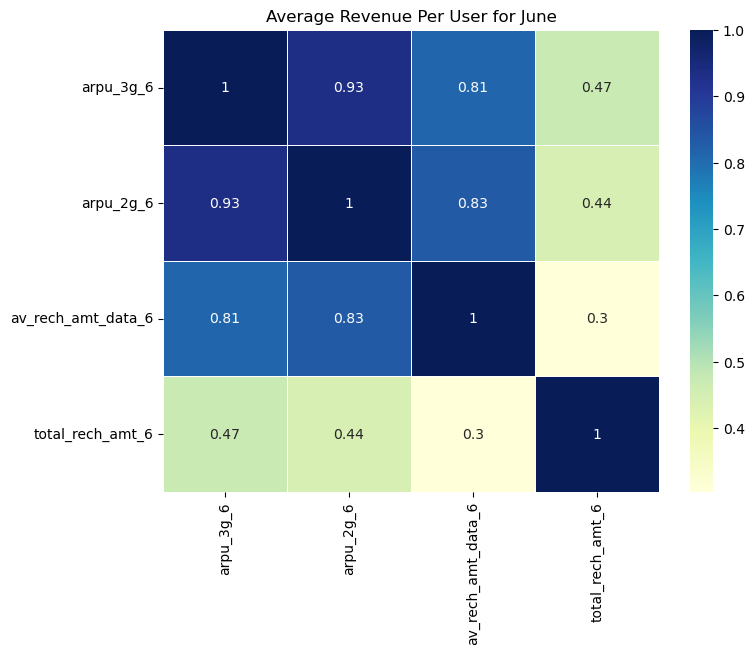

In [53]:
create_heat_map(telecom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6','total_rech_amt_6']].corr(), 'Average Revenue Per User for June')

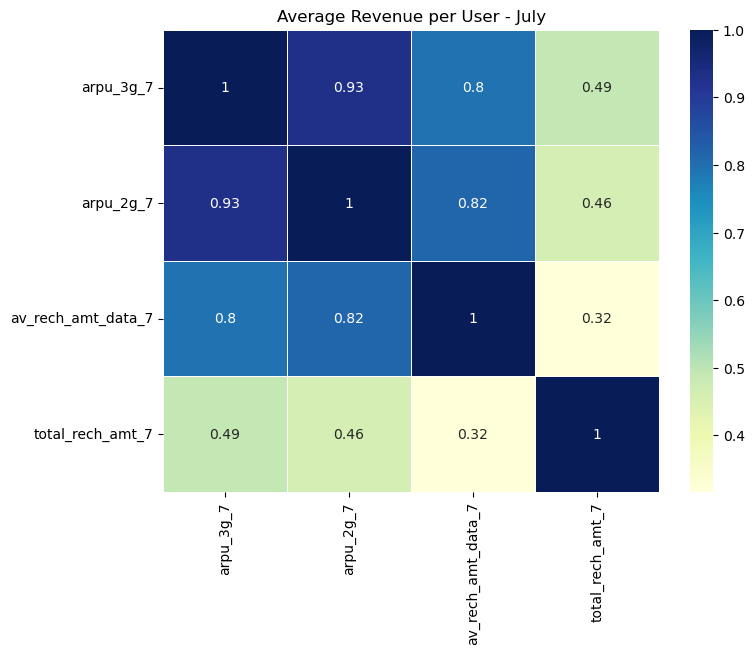

In [54]:
create_heat_map(telecom_data[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7','total_rech_amt_7']].corr(), 'Average Revenue per User - July')

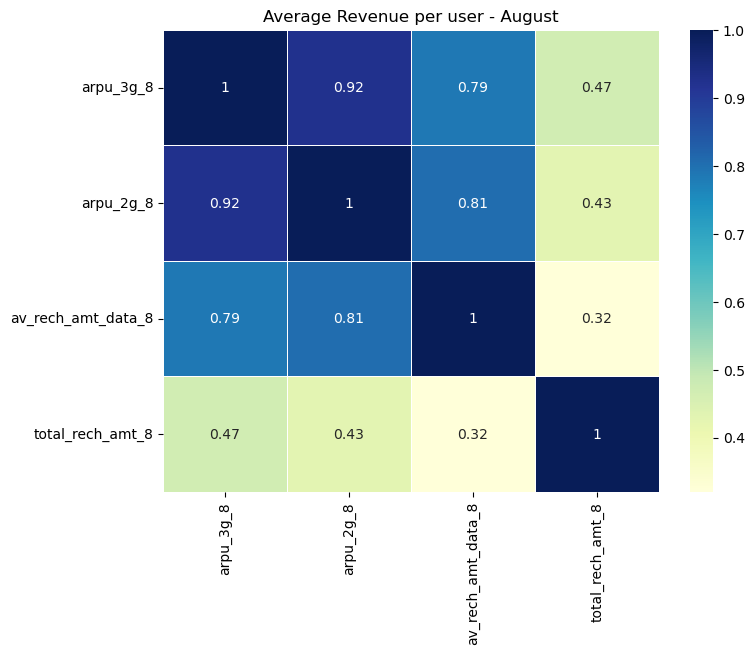

In [55]:
create_heat_map(telecom_data[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8','total_rech_amt_8']].corr(),'Average Revenue per user - August')

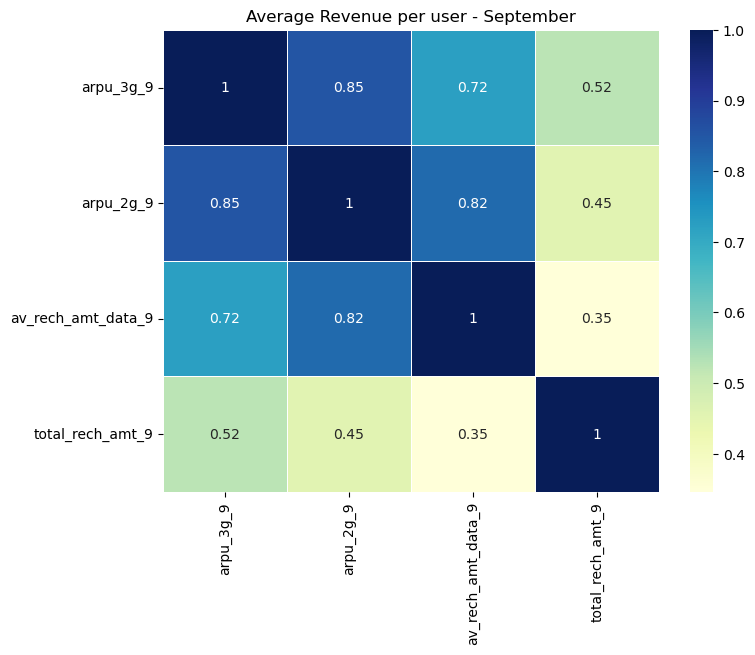

In [56]:
create_heat_map(telecom_data[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9','total_rech_amt_9']].corr(), 'Average Revenue per user - September')

##### Observations: From the above results we can see arpu_3g_* and arpu_2g_* are highly correlated with av_rech_amt_data_*. So we can drop those columns

In [57]:
col_drop=['arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9']
col_drop

['arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9']

In [58]:
telecom_data.shape

(99999, 186)

In [59]:
telecom_data.drop(col_drop,axis=1,inplace=True)

In [60]:
telecom_data.shape

(99999, 178)

In [61]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

std_og_t2t_mou_9      7.745077
roam_ic_mou_9         7.745077
loc_ic_mou_9          7.745077
loc_og_t2c_mou_9      7.745077
std_og_t2m_mou_9      7.745077
loc_og_t2f_mou_9      7.745077
std_og_t2f_mou_9      7.745077
std_og_mou_9          7.745077
loc_og_t2m_mou_9      7.745077
std_ic_t2f_mou_9      7.745077
spl_ic_mou_9          7.745077
loc_og_t2t_mou_9      7.745077
isd_og_mou_9          7.745077
std_ic_mou_9          7.745077
spl_og_mou_9          7.745077
og_others_9           7.745077
roam_og_mou_9         7.745077
std_ic_t2m_mou_9      7.745077
isd_ic_mou_9          7.745077
ic_others_9           7.745077
loc_ic_t2f_mou_9      7.745077
loc_ic_t2m_mou_9      7.745077
onnet_mou_9           7.745077
std_ic_t2t_mou_9      7.745077
loc_og_mou_9          7.745077
loc_ic_t2t_mou_9      7.745077
offnet_mou_9          7.745077
isd_og_mou_8          5.378054
std_ic_t2f_mou_8      5.378054
og_others_8           5.378054
std_og_mou_8          5.378054
spl_og_mou_8          5.378054
std_ic_t

In [62]:
null_columns = telecom_data.columns[telecom_data.isnull().any()]
list(null_columns)

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


##### Impute missing values using XGBoost for each column with missing values


In [63]:
for column in null_columns:
    # Step 1: Create training and testing datasets
    train_data = telecom_data[telecom_data[column].notnull()]
    test_data = telecom_data[telecom_data[column].isnull()]

    # Step 2: Prepare features and target variable
    X_train = train_data.drop(columns=[column])  # Exclude the column being imputed
    y_train = train_data[column]

    # If there's no data to train on, continue to the next column
    if X_train.empty:
        continue

    # Prepare test features
    X_test = test_data.drop(columns=[column])  # Same as for training

    # Step 3: Train the XGBoost model
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)

    # Step 4: Predict the missing values
    predicted_values = model.predict(X_test)

    # Step 5: Impute the missing values in the original DataFrame
    telecom_data.loc[telecom_data[column].isnull(), column] = predicted_values

In [64]:
(telecom_data.isnull().mean()*100).sort_values(ascending=False)

mobile_number         0.0
last_day_rch_amt_6    0.0
isd_ic_mou_6          0.0
isd_ic_mou_7          0.0
isd_ic_mou_8          0.0
isd_ic_mou_9          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8           0.0
ic_others_9           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
spl_ic_mou_9          0.0
spl_ic_mou_8          0.0
spl_ic_mou_7          0.0
std_ic_t2f_mou_8      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_9      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_9      0.0
spl_ic_mou_6          0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
std_ic_mou_9

In [65]:
telecom_data.shape

(99999, 178)

In [66]:
telecom_data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,2454.313965,2749.799072,0.00,3304.178955,2786.55957,2359.362061,0.00,2825.996826,1298.213989,197.214539,0.00,820.622925,1268.732056,742.330322,0.00,820.555908,774.773926,1547.21814,0.00,5299.081543,1490.52417,1551.015747,0.00,1053.321777,44.929836,23.18058,0.00,52.44305,45.040405,53.360462,0.00,55.148491,2113.510254,1599.908813,0.00,1396.099243,2114.064697,2548.395508,0.00,2245.713623,1271.003662,1789.911743,0.00,1767.674316,71.878395,51.981907,0.00,83.653160,132.500809,429.567719,0.00,1067.47937,50.854378,11.641144,0.00,14.701731,130.557114,126.838882,0.00,193.739548,190.634277,5.792817,0.0,25.182848,0.00,0.00,0.00,0.00,1492.835327,561.808105,0.16,1065.126465,1047.631226,1052.204956,4.13,434.066620,119.560684,271.134277,1.15,807.598694,538.205627,159.816696,5.44,427.594757,33.852772,54.904057,0.00,246.815323,443.303436,688.195068,0.00,288.404968,101.448128,72.866539,0.00,210.483505,491.476379,663.458191,0.00,706.769592,0.00,0.00,5.44,0.00,0.717093,0.508368,0.00,1.749456,86.691956,191.420761,0.00,55.761131,21.831392,0.139009,0.00,228.948074,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.110000,78.680000,7.68,18.340000,15.74000

#### Filtering the high Value Customers from Good Phase

##### High Value customers are found by the amount more than or equal to the 70th percentile of the average value of total_rech_amt_6 and total_rech_amt_7 in good phase 

In [67]:
telecom_data['good_phase_avg_rech_amt']=(telecom_data['total_rech_amt_6']+telecom_data['total_rech_amt_7'])/2

In [68]:
telecom_data['good_phase_avg_rech_amt'].head()

0    307.0
1    229.0
2    241.5
3    270.0
4    273.0
Name: good_phase_avg_rech_amt, dtype: float64

##### Filtering the customers who fall in or above the 70th percentile

In [69]:
threshhold=telecom_data['good_phase_avg_rech_amt'].quantile(0.70)

In [70]:
telecom_data.shape

(99999, 179)

In [71]:
telecom_data_hv=telecom_data[telecom_data['good_phase_avg_rech_amt']>=threshhold]

In [72]:
telecom_data_hv.shape

(30011, 179)

In [73]:
telecom_data_hv['good_phase_avg_rech_amt'].head()

7     1185.0
8      519.0
13     380.0
16     459.0
17     408.0
Name: good_phase_avg_rech_amt, dtype: float64

##### We can drop the columns related to recharge as we have derived a new variable and it will lead to multicollinearity

In [74]:
telecom_data_hv.drop(['total_rech_amt_6','total_rech_amt_7'], axis=1, inplace=True)

##### Target Variable:Churn

##### For tagging churn we are asked to use the values from the columns total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9

In [75]:
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

In [76]:
telecom_data_hv[churn_col].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
7,0.00,0.00,0.0,0.0
8,34.91,142.18,0.0,0.0
13,631.86,446.09,0.0,0.0
16,334.56,255.74,0.0,0.0
17,87.13,631.08,0.0,0.0


In [77]:
telecom_data_hv['churn'] = np.where(telecom_data_hv[churn_col].sum(axis=1) == 0, 1, 0)

In [78]:
telecom_data_hv[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head(10)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
7,0.00,0.00,0.00,0.00,1
8,34.91,142.18,0.00,0.00,0
13,631.86,446.09,0.00,0.00,0
16,334.56,255.74,0.00,0.00,0
17,87.13,631.08,0.00,0.00,0
21,252.61,1031.53,0.00,0.00,0
24,330.03,627.78,0.00,0.00,0
33,114.16,1.70,30.92,5588.11,0
38,114.09,708.04,0.00,0.00,0
41,165.84,89.13,0.00,0.00,0


##### Dropping all the attributes corresponding to the churn phase

In [79]:
churn_phase_col=[col for col in telecom_data.columns if '_9' in col]
churn_phase_col

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [80]:
telecom_data_hv.shape

(30011, 178)

In [81]:
telecom_data_hv.drop(churn_phase_col,axis=1,inplace=True)

In [82]:
telecom_data_hv.shape


(30011, 135)

##### Class Imbalance

In [83]:
churn_percentages=(telecom_data_hv['churn'].value_counts()/len(telecom_data))*100
churn_percentages

churn
0    27.418274
1     2.593026
Name: count, dtype: float64

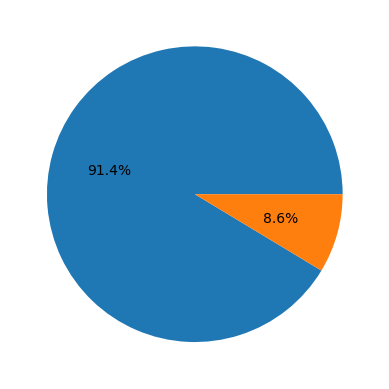

In [84]:
plt.pie(churn_percentages,autopct='%1.1f%%')
plt.show()

###### Observation:As we can see 91.4% of the customers donot churn, there is a class imbalance

##### Handling Outliers

##### Derive New Features

In [85]:
telecom_data_hv.head(20)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_avg_rech_amt,churn
7,7000701601,1069.180,1349.850,3171.480,57.840000,54.68,52.29,453.430000,567.16,325.91,16.230000,33.49,31.64,23.740000,12.59,38.06,51.39000,31.38,40.28,308.630000,447.38,162.28,62.130000,55.14,53.23,0.000000,0.0,0.00,422.160000,533.91,255.79,4.300000,23.29,12.01,49.890000,31.76,49.14,6.660000,20.08,16.68,60.860000,75.14,77.84,0.000000,0.18,10.01,4.500000,0.00,6.50,0.000000,0.0,0.0,487.53,609.24,350.16,58.140000,32.26,27.31,217.560000,221.49,121.19,152.160000,101.46,39.53,427.880000,355.23,188.04,36.890000,11.83,30.39,91.440000,126.99,141.33,52.19000,34.24,22.21,180.540000,173.08,193.94,626.46,558.04,428.74,0.210000,0.0,0.0,2.060000,14.53,31.59,15.740000,15.19,15.14,5,5,7,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.690000,351.03,35.08,94.660000,80.63,136.48,0.000000,0.00,0.00,0.000000,0.00,0.00,297.13000,217.59,12.49,80.960000,70.58,50.54,0.000000,0.00,0.00,0.000000,0.0,7.15,378.090000,288.18,63.04,116.560000,133.43,22.58,13.690000,10.04,75.69,0.000000,0.00,0.00,130.260000,143.48,98.28,0.000000,0.00,0.00,0.000000,0.00,10.23,0.000000,0.0,0.0,508.36,431.66,171.56,23.840000,9.84,0.31,57.580000,13.98,15.48,0.000000,0.00,0.00,81.430000,23.83,15.79,0.000000,0.58,0.10,22.430000,4.08,0.65,0.00000,0.00,0.00,22.430000,4.66,0.75,103.86,28.49,16.54,0.000000,0.0,0.0,0.000000,0.00,0.00,0.000000,0.00,0.00,19,21,14,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,492.846,205.671,593.260,501.760000,108.39,534.24,413.310000,119.28,482.46,23.530000,144.24,72.11,7.980000,35.26,1.44,49.63000,6.19,36.01,151.130000,47.28,294.46,4.540000,0.00,23.51,0.000000,0.0,0.49,205.310000,53.48,353.99,446.410000,85.98,498.23,255.360000,52.94,156.94,0.000000,0.00,0.00,701.780000,138.93,655.18,0.000000,0.00,1.29,0.000000,0.00,4.78,0.000000,0.0,0.0,907.09,192.41,1015.26,67.88

For deriving additional features, we need to determine the various benefits or packages availed by the user in the following 3 phases:
1. Good Phase (In June and July)
2. Action Phase (In August)
3. Churn Phase (In September), here a churn will be determined by zero usage.

Let's create these new features based on the above information

In [86]:
def create_new_columns_and_drop_old(df):
    cols_to_drop = []
    
    for col in df.columns:
        # Look for columns ending with '_6'
        if '_6' in col:
            # Find the corresponding '_7' column
            col_7 = col.replace('_6', '_7')
            if col_7 in df.columns:
                # Check if the column name contains 'av' or 'avg'
                if 'av' in col or 'avg' in col:
                    # Create a new column with the average of _6 and _7
                    new_col_name = f'good_phase_{col.replace("_6", "")}_avg'
                    df[new_col_name] = (df[col] + df[col_7]) / 2
                elif 'max' in col:  # Handle max case
                    # Create a new column with the maximum of _6 and _7
                    new_col_name = f'good_phase_{col.replace("_6", "")}_max'
                    df[new_col_name] = df[[col, col_7]].max(axis=1)
                else:
                    # Create a new column with the sum of _6 and _7
                    new_col_name = f'good_phase_{col.replace("_6", "")}_sum'
                    df[new_col_name] = df[col] + df[col_7]
                
                # Add _6 and _7 columns to the list for dropping later
                cols_to_drop.extend([col, col_7])
    
    # Drop the original _6 and _7 columns
    df.drop(columns=cols_to_drop, inplace=True)
    
    return df

In [87]:
telecom_data_hv = create_new_columns_and_drop_old(telecom_data_hv)
telecom_data_hv.head(20)

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_avg_rech_amt,churn,good_phase_arpu_sum,good_phase_onnet_mou_sum,good_phase_offnet_mou_sum,good_phase_roam_ic_mou_sum,good_phase_roam_og_mou_sum,good_phase_loc_og_t2t_mou_sum,good_phase_loc_og_t2m_mou_sum,good_phase_loc_og_t2f_mou_sum,good_phase_loc_og_t2c_mou_sum,good_phase_loc_og_mou_sum,good_phase_std_og_t2t_mou_sum,good_phase_std_og_t2m_mou_sum,good_phase_std_og_t2f_mou_sum,good_phase_std_og_mou_sum,good_phase_isd_og_mou_sum,good_phase_spl_og_mou_sum,good_phase_og_others_sum,good_phase_total_og_mou_sum,good_phase_loc_ic_t2t_mou_sum,good_phase_loc_ic_t2m_mou_sum,good_phase_loc_ic_t2f_mou_sum,good_phase_loc_ic_mou_sum,good_phase_std_ic_t2t_mou_sum,good_phase_std_ic_t2m_mou_sum,good_phase_std_ic_t2f_mou_sum,good_phase_std_ic_mou_sum,good_phase_total_ic_mou_sum,good_phase_spl_ic_mou_sum,good_phase_isd_ic_mou_sum,good_phase_ic_others_sum,good_phase_total_rech_num_sum,good_phase_max_rech_amt_max,good_phase_last_day_rch_amt_sum,good_phase_total_rech_data_sum,good_phase_max_rech_data_max,good_phase_av_rech_amt_data_avg,good_phase_vol_2g_mb_sum,good_phase_vol_3g_mb_sum,good_phase_monthly_2g_sum,good_phase_sachet_2g_sum,good_phase_monthly_3g_sum,good_phase_sachet_3g_sum
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,2419.030,112.520000,1020.590000,49.720000,36.330000,82.77000,756.010000,117.270000,0.000000,956.070000,27.590000,81.650000,26.740000,136.000000,0.180000,4.500000,0.000000,1096.77,90.400000,439.050000,253.620000,783.110000,48.720000,218.430000,86.43000,353.620000,1184.50,0.210000,16.590000,30.930000,10,1580,0,0.0,0.0,0.0,0.00,0.00,0,0,0,0
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,23.0,69.0,0.03,11.94,0,3,0,0,315,21.03,910.65,122.16,0.0,519.0,0,870.944,764.720000,175.290000,0.000000,0.000000,514.72000,151.540000,0.000000,0.000000,666.270000,249.990000,23.730000,0.000000,273.740000,0.000000,0.000000,0.000000,940.02,33.680000,71.560000,0.000000,105.260000,0.580000,26.510000,0.00000,27.090000,132.35,0.000000,0.000000,0.000000,40,154,50,2.0,154.0,88.5,356.00,750.95,1,1,0,0
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,3.0,23.0,69.0,0.02,0.00,0,3,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,698.517,610.150000,532.590000,167.770000,43.240000,55.82000,198.410000,4.540000,0.000000,258.790000,532.390000,308.300000,0.000000,840.710000,0.000000,0.000000,0.000000,1099.50,75.460000,161.410000,4.810000,241.690000,153.970000,337.920000,0.00000,491.900000,1141.19,0.450000,307.390000,99.720000,10,110,160,0.0,0.0,0.0,0.00,0.00,0,0,0,0
16,7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.0,0.0,0.0,0.00,0.00,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0,730.844,124.52000

In [88]:
telecom_data_hv['good_phase_vbc_3g'] = telecom_data_hv['jun_vbc_3g']+telecom_data_hv['jul_vbc_3g']

In [89]:
telecom_data_hv.drop(columns=['jun_vbc_3g','jul_vbc_3g' ], inplace=True)

In [90]:
telecom_data_hv.head(20)
max_columns = [col for col in telecom_data_hv.columns if 'max' in col]
max_columns

['max_rech_amt_8',
 'max_rech_data_8',
 'good_phase_max_rech_amt_max',
 'good_phase_max_rech_data_max']

In [91]:
# Replace '_8' with '' and prepend 'action_phase_' to each column name
# Update columns that end with '_8' only
telecom_data_hv.columns = [
    'action_phase_' + col[:-2] if col.endswith('_8') else col for col in telecom_data_hv.columns
]

In [92]:
telecom_data_hv.head()

,mobile_number,action_phase_arpu,action_phase_onnet_mou,action_phase_offnet_mou,action_phase_roam_ic_mou,action_phase_roam_og_mou,action_phase_loc_og_t2t_mou,action_phase_loc_og_t2m_mou,action_phase_loc_og_t2f_mou,action_phase_loc_og_t2c_mou,action_phase_loc_og_mou,action_phase_std_og_t2t_mou,action_phase_std_og_t2m_mou,action_phase_std_og_t2f_mou,action_phase_std_og_mou,action_phase_isd_og_mou,action_phase_spl_og_mou,action_phase_og_others,action_phase_total_og_mou,action_phase_loc_ic_t2t_mou,action_phase_loc_ic_t2m_mou,action_phase_loc_ic_t2f_mou,action_phase_loc_ic_mou,action_phase_std_ic_t2t_mou,action_phase_std_ic_t2m_mou,action_phase_std_ic_t2f_mou,action_phase_std_ic_mou,action_phase_total_ic_mou,action_phase_spl_ic_mou,action_phase_isd_ic_mou,action_phase_ic_others,action_phase_total_rech_num,action_phase_total_rech_amt,action_phase_max_rech_amt,action_phase_last_day_rch_amt,action_phase_total_rech_data,action_phase_max_rech_data,action_phase_av_rech_amt_data,action_phase_vol_2g_mb,action_phase_vol_3g_mb,action_phase_monthly_2g,action_phase_sachet_2g,action_phase_monthly_3g,action_phase_sachet_3g,aon,aug_vbc_3g,sep_vbc_3g,good_phase_avg_rech_amt,churn,good_phase_arpu_sum,good_phase_onnet_mou_sum,good_phase_offnet_mou_sum,good_phase_roam_ic_mou_sum,good_phase_roam_og_mou_sum,good_phase_loc_og_t2t_mou_sum,good_phase_loc_og_t2m_mou_sum,good_phase_loc_og_t2f_mou_sum,good_phase_loc_og_t2c_mou_sum,good_phase_loc_og_mou_sum,good_phase_std_og_t2t_mou_sum,good_phase_std_og_t2m_mou_sum,good_phase_std_og_t2f_mou_sum,good_phase_std_og_mou_sum,good_phase_isd_og_mou_sum,good_phase_spl_og_mou_sum,good_phase_og_others_sum,good_phase_total_og_mou_sum,good_phase_loc_ic_t2t_mou_sum,good_phase_loc_ic_t2m_mou_sum,good_phase_loc_ic_t2f_mou_sum,good_phase_loc_ic_mou_sum,good_phase_std_ic_t2t_mou_sum,good_phase_std_ic_t2m_mou_sum,good_phase_std_ic_t2f_mou_sum,good_phase_std_ic_mou_sum,good_phase_total_ic_mou_sum,good_phase_spl_ic_mou_sum,good_phase_isd_ic_mou_sum,good_phase_ic_others_sum,good_phase_total_rech_num_sum,good_phase_max_rech_amt_max,good_phase_last_day_rch_amt_sum,good_phase_total_rech_data_sum,good_phase_max_rech_data_max,good_phase_av_rech_amt_data_avg,good_phase_vol_2g_mb_sum,good_phase_vol_3g_mb_sum,good_phase_monthly_2g_sum,good_phase_sachet_2g_sum,good_phase_monthly_3g_sum,good_phase_sachet_3g_sum,good_phase_vbc_3g
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.00,0.00,0,0,0,0,802,57.74,0.0,1185.0,1,2419.030,112.52,1020.59,49.72,36.33,82.77,756.01,117.27,0.0,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,1096.77,90.40,439.05,253.62,783.11,48.72,218.43,86.43,353.62,1184.50,0.21,16.59,30.93,10,1580,0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,38.12
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,23.0,69.0,0.03,11.94,0,3,0,0,315,21.03,0.0,519.0,0,870.944,764.72,175.29,0.00,0.00,514.72,151.54,0.00,0.0,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,940.02,33.68,71.56,0.00,105.26,0.58,26.51,0.00,27.09,132.35,0.00,0.00,0.00,40,154,50,2.0,154.0,88.5,356.0,750.95,1,1,0,0,1032.81
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,3.0,23.0,69.0,0.02,0.00,0,3,0,0,2607,0.00,0.0,380.0,0,698.517,610.15,532.59,167.77,43.24,55.82,198.41,4.54,0.0,258.79,532.39,308.30,0.00,840.71,0.00,0.00,0.00,1099.50,75.46,161.41,4.81,241.69,153.97,337.92,0.00,491.90,1141.19,0.45,307.39,99.72,10,110,160,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0.00
16,7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.

In [93]:
telecom_data_hv.head()

,mobile_number,action_phase_arpu,action_phase_onnet_mou,action_phase_offnet_mou,action_phase_roam_ic_mou,action_phase_roam_og_mou,action_phase_loc_og_t2t_mou,action_phase_loc_og_t2m_mou,action_phase_loc_og_t2f_mou,action_phase_loc_og_t2c_mou,action_phase_loc_og_mou,action_phase_std_og_t2t_mou,action_phase_std_og_t2m_mou,action_phase_std_og_t2f_mou,action_phase_std_og_mou,action_phase_isd_og_mou,action_phase_spl_og_mou,action_phase_og_others,action_phase_total_og_mou,action_phase_loc_ic_t2t_mou,action_phase_loc_ic_t2m_mou,action_phase_loc_ic_t2f_mou,action_phase_loc_ic_mou,action_phase_std_ic_t2t_mou,action_phase_std_ic_t2m_mou,action_phase_std_ic_t2f_mou,action_phase_std_ic_mou,action_phase_total_ic_mou,action_phase_spl_ic_mou,action_phase_isd_ic_mou,action_phase_ic_others,action_phase_total_rech_num,action_phase_total_rech_amt,action_phase_max_rech_amt,action_phase_last_day_rch_amt,action_phase_total_rech_data,action_phase_max_rech_data,action_phase_av_rech_amt_data,action_phase_vol_2g_mb,action_phase_vol_3g_mb,action_phase_monthly_2g,action_phase_sachet_2g,action_phase_monthly_3g,action_phase_sachet_3g,aon,aug_vbc_3g,sep_vbc_3g,good_phase_avg_rech_amt,churn,good_phase_arpu_sum,good_phase_onnet_mou_sum,good_phase_offnet_mou_sum,good_phase_roam_ic_mou_sum,good_phase_roam_og_mou_sum,good_phase_loc_og_t2t_mou_sum,good_phase_loc_og_t2m_mou_sum,good_phase_loc_og_t2f_mou_sum,good_phase_loc_og_t2c_mou_sum,good_phase_loc_og_mou_sum,good_phase_std_og_t2t_mou_sum,good_phase_std_og_t2m_mou_sum,good_phase_std_og_t2f_mou_sum,good_phase_std_og_mou_sum,good_phase_isd_og_mou_sum,good_phase_spl_og_mou_sum,good_phase_og_others_sum,good_phase_total_og_mou_sum,good_phase_loc_ic_t2t_mou_sum,good_phase_loc_ic_t2m_mou_sum,good_phase_loc_ic_t2f_mou_sum,good_phase_loc_ic_mou_sum,good_phase_std_ic_t2t_mou_sum,good_phase_std_ic_t2m_mou_sum,good_phase_std_ic_t2f_mou_sum,good_phase_std_ic_mou_sum,good_phase_total_ic_mou_sum,good_phase_spl_ic_mou_sum,good_phase_isd_ic_mou_sum,good_phase_ic_others_sum,good_phase_total_rech_num_sum,good_phase_max_rech_amt_max,good_phase_last_day_rch_amt_sum,good_phase_total_rech_data_sum,good_phase_max_rech_data_max,good_phase_av_rech_amt_data_avg,good_phase_vol_2g_mb_sum,good_phase_vol_3g_mb_sum,good_phase_monthly_2g_sum,good_phase_sachet_2g_sum,good_phase_monthly_3g_sum,good_phase_sachet_3g_sum,good_phase_vbc_3g
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.00,0.00,0,0,0,0,802,57.74,0.0,1185.0,1,2419.030,112.52,1020.59,49.72,36.33,82.77,756.01,117.27,0.0,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,1096.77,90.40,439.05,253.62,783.11,48.72,218.43,86.43,353.62,1184.50,0.21,16.59,30.93,10,1580,0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,38.12
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,23.0,69.0,0.03,11.94,0,3,0,0,315,21.03,0.0,519.0,0,870.944,764.72,175.29,0.00,0.00,514.72,151.54,0.00,0.0,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,940.02,33.68,71.56,0.00,105.26,0.58,26.51,0.00,27.09,132.35,0.00,0.00,0.00,40,154,50,2.0,154.0,88.5,356.0,750.95,1,1,0,0,1032.81
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,3.0,23.0,69.0,0.02,0.00,0,3,0,0,2607,0.00,0.0,380.0,0,698.517,610.15,532.59,167.77,43.24,55.82,198.41,4.54,0.0,258.79,532.39,308.30,0.00,840.71,0.00,0.00,0.00,1099.50,75.46,161.41,4.81,241.69,153.97,337.92,0.00,491.90,1141.19,0.45,307.39,99.72,10,110,160,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0.00
16,7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.

In [94]:
mou_columns = [col for col in telecom_data_hv.columns if 'mou' in col]

mou_columns

['action_phase_onnet_mou',
 'action_phase_offnet_mou',
 'action_phase_roam_ic_mou',
 'action_phase_roam_og_mou',
 'action_phase_loc_og_t2t_mou',
 'action_phase_loc_og_t2m_mou',
 'action_phase_loc_og_t2f_mou',
 'action_phase_loc_og_t2c_mou',
 'action_phase_loc_og_mou',
 'action_phase_std_og_t2t_mou',
 'action_phase_std_og_t2m_mou',
 'action_phase_std_og_t2f_mou',
 'action_phase_std_og_mou',
 'action_phase_isd_og_mou',
 'action_phase_spl_og_mou',
 'action_phase_total_og_mou',
 'action_phase_loc_ic_t2t_mou',
 'action_phase_loc_ic_t2m_mou',
 'action_phase_loc_ic_t2f_mou',
 'action_phase_loc_ic_mou',
 'action_phase_std_ic_t2t_mou',
 'action_phase_std_ic_t2m_mou',
 'action_phase_std_ic_t2f_mou',
 'action_phase_std_ic_mou',
 'action_phase_total_ic_mou',
 'action_phase_spl_ic_mou',
 'action_phase_isd_ic_mou',
 'good_phase_onnet_mou_sum',
 'good_phase_offnet_mou_sum',
 'good_phase_roam_ic_mou_sum',
 'good_phase_roam_og_mou_sum',
 'good_phase_loc_og_t2t_mou_sum',
 'good_phase_loc_og_t2m_mou_sum'

In [199]:
telecom_data_hv['arpu_ratio'] = telecom_data_hv['action_phase_arpu'] / telecom_data_hv['good_phase_arpu_sum']
telecom_data_hv['difference_arpu'] = telecom_data_hv['action_phase_arpu'] - telecom_data_hv['good_phase_arpu_sum']
telecom_data_hv['decrease_arpu_action'] = np.where(telecom_data_hv['difference_arpu'] < 0, 1, 0)

telecom_data_hv['good_phase_total_mou']=telecom_data_hv['good_phase_total_og_mou_sum']+telecom_data_hv['good_phase_total_ic_mou_sum']
telecom_data_hv['action_phase_total_mou']=telecom_data_hv['action_phase_total_og_mou']+telecom_data_hv['action_phase_total_ic_mou']
telecom_data_hv['difference_mou']=telecom_data_hv['action_phase_total_mou']-telecom_data_hv['good_phase_total_mou']
telecom_data_hv['decrease_mou_action']=np.where((telecom_data_hv['difference_mou'] < 0), 1, 0)

# Change features
telecom_data_hv['change_in_arpu'] = telecom_data_hv['action_phase_arpu'] - telecom_data_hv['good_phase_arpu_sum']
telecom_data_hv['change_in_onnet_mou'] = telecom_data_hv['action_phase_onnet_mou'] - telecom_data_hv['good_phase_onnet_mou_sum']

KeyError: 'good_phase_arpu_sum'

In [96]:
telecom_data_hv.head()

,mobile_number,action_phase_arpu,action_phase_onnet_mou,action_phase_offnet_mou,action_phase_roam_ic_mou,action_phase_roam_og_mou,action_phase_loc_og_t2t_mou,action_phase_loc_og_t2m_mou,action_phase_loc_og_t2f_mou,action_phase_loc_og_t2c_mou,action_phase_loc_og_mou,action_phase_std_og_t2t_mou,action_phase_std_og_t2m_mou,action_phase_std_og_t2f_mou,action_phase_std_og_mou,action_phase_isd_og_mou,action_phase_spl_og_mou,action_phase_og_others,action_phase_total_og_mou,action_phase_loc_ic_t2t_mou,action_phase_loc_ic_t2m_mou,action_phase_loc_ic_t2f_mou,action_phase_loc_ic_mou,action_phase_std_ic_t2t_mou,action_phase_std_ic_t2m_mou,action_phase_std_ic_t2f_mou,action_phase_std_ic_mou,action_phase_total_ic_mou,action_phase_spl_ic_mou,action_phase_isd_ic_mou,action_phase_ic_others,action_phase_total_rech_num,action_phase_total_rech_amt,action_phase_max_rech_amt,action_phase_last_day_rch_amt,action_phase_total_rech_data,action_phase_max_rech_data,action_phase_av_rech_amt_data,action_phase_vol_2g_mb,action_phase_vol_3g_mb,action_phase_monthly_2g,action_phase_sachet_2g,action_phase_monthly_3g,action_phase_sachet_3g,aon,aug_vbc_3g,sep_vbc_3g,good_phase_avg_rech_amt,churn,good_phase_arpu_sum,good_phase_onnet_mou_sum,good_phase_offnet_mou_sum,good_phase_roam_ic_mou_sum,good_phase_roam_og_mou_sum,good_phase_loc_og_t2t_mou_sum,good_phase_loc_og_t2m_mou_sum,good_phase_loc_og_t2f_mou_sum,good_phase_loc_og_t2c_mou_sum,good_phase_loc_og_mou_sum,good_phase_std_og_t2t_mou_sum,good_phase_std_og_t2m_mou_sum,good_phase_std_og_t2f_mou_sum,good_phase_std_og_mou_sum,good_phase_isd_og_mou_sum,good_phase_spl_og_mou_sum,good_phase_og_others_sum,good_phase_total_og_mou_sum,good_phase_loc_ic_t2t_mou_sum,good_phase_loc_ic_t2m_mou_sum,good_phase_loc_ic_t2f_mou_sum,good_phase_loc_ic_mou_sum,good_phase_std_ic_t2t_mou_sum,good_phase_std_ic_t2m_mou_sum,good_phase_std_ic_t2f_mou_sum,good_phase_std_ic_mou_sum,good_phase_total_ic_mou_sum,good_phase_spl_ic_mou_sum,good_phase_isd_ic_mou_sum,good_phase_ic_others_sum,good_phase_total_rech_num_sum,good_phase_max_rech_amt_max,good_phase_last_day_rch_amt_sum,good_phase_total_rech_data_sum,good_phase_max_rech_data_max,good_phase_av_rech_amt_data_avg,good_phase_vol_2g_mb_sum,good_phase_vol_3g_mb_sum,good_phase_monthly_2g_sum,good_phase_sachet_2g_sum,good_phase_monthly_3g_sum,good_phase_sachet_3g_sum,good_phase_vbc_3g,arpu_ratio,difference_arpu,decrease_arpu_action,good_phase_total_mou,action_phase_total_mou,difference_mou,decrease_mou_action,change_in_arpu,change_in_onnet_mou
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.00,0.00,0,0,0,0,802,57.74,0.0,1185.0,1,2419.030,112.52,1020.59,49.72,36.33,82.77,756.01,117.27,0.0,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,1096.77,90.40,439.05,253.62,783.11,48.72,218.43,86.43,353.62,1184.50,0.21,16.59,30.93,10,1580,0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,38.12,1.311054,752.450,0,2281.27,778.90,-1502.37,1,752.450,-60.23
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,23.0,69.0,0.03,11.94,0,3,0,0,315,21.03,0.0,519.0,0,870.944,764.72,175.29,0.00,0.00,514.72,151.54,0.00,0.0,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,940.02,33.68,71.56,0.00,105.26,0.58,26.51,0.00,27.09,132.35,0.00,0.00,0.00,40,154,50,2.0,154.0,88.5,356.0,750.95,1,1,0,0,1032.81,0.157716,-733.582,1,1072.37,188.10,-884.27,1,-733.582,-729.64
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,3.0,23.0,69.0,0.02,0.00,0,3,0,0,2607,0.00,0.0,380.0,0,698.517,610.15,532.59,167.77,43.24,55.82,198.41,4.54,0.0,258.79,532.39,308.30,0.00,840.71,0.00,0.00,0.00

In [97]:
telecom_data_hv['difference_rech_amt'] = telecom_data_hv['action_phase_total_rech_amt'] - telecom_data_hv['good_phase_avg_rech_amt']
telecom_data_hv['decrease_rech_amt_action'] = np.where((telecom_data_hv['difference_rech_amt'] < 0), 1, 0) 
telecom_data_hv['difference_vbc']=telecom_data_hv['aug_vbc_3g']-telecom_data_hv['good_phase_vbc_3g']
telecom_data_hv['decrease_vbc_action'] = np.where(telecom_data_hv['difference_vbc'] < 0 , 1, 0)

In [98]:
telecom_data_hv['aon_months']=(telecom_data_hv['aon']/30).round(0)
aon_range = [0, 6, 12, 24, 60, 61]
aon_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_data_hv['aon_range'] = pd.cut(telecom_data_hv['aon_months'], aon_range, labels=aon_label)
telecom_data_hv['aon_range'].head()
# Dropping the aon_months to avoid multi-collinearity
telecom_data_hv.drop('aon_months',axis=1,inplace=True)

### Exploratory Data Analysis

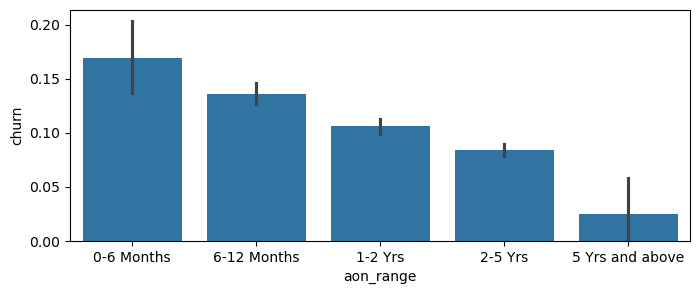

In [99]:
plt.figure(figsize=(8,3))
sns.barplot(x='aon_range',y='churn', data=telecom_data_hv)
plt.show()

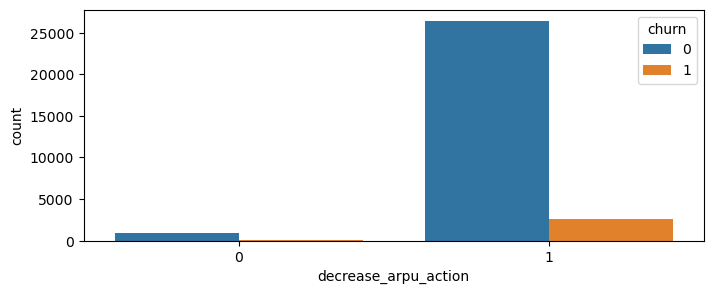

In [100]:
plt.figure(figsize=(8,3))
sns.countplot(x=telecom_data_hv['decrease_arpu_action'], hue=telecom_data_hv['churn'])
plt.show()

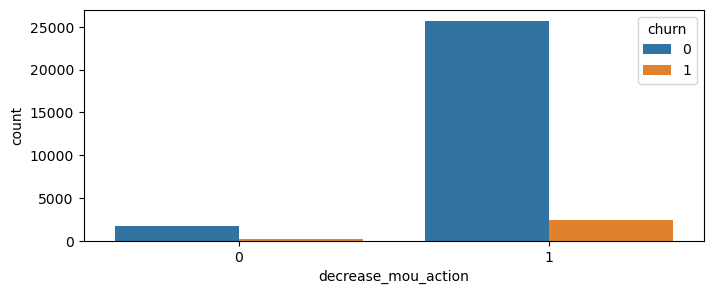

In [101]:
plt.figure(figsize=(8,3))
sns.countplot(x=telecom_data_hv['decrease_mou_action'], hue=telecom_data_hv['churn'])
plt.show()

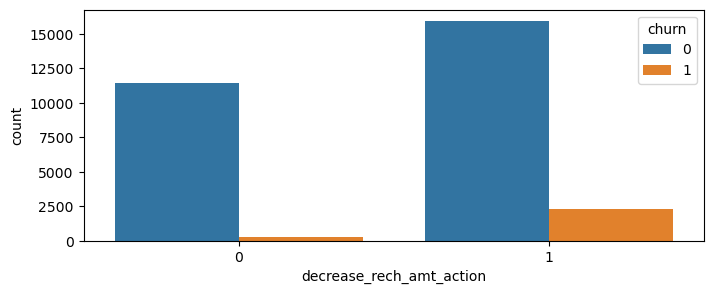

In [102]:
plt.figure(figsize=(8,3))
sns.countplot(x=telecom_data_hv['decrease_rech_amt_action'], hue=telecom_data_hv['churn'])
plt.show()

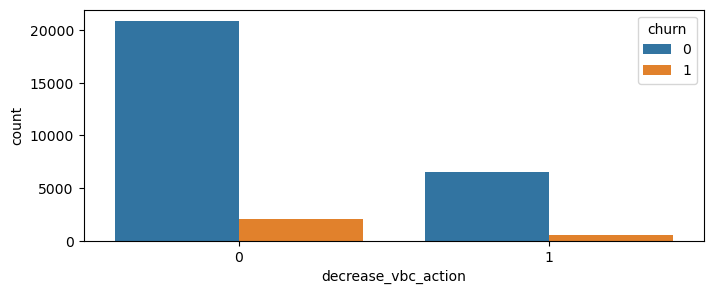

In [103]:
plt.figure(figsize=(8,3))
sns.countplot(x=telecom_data_hv['decrease_vbc_action'], hue=telecom_data_hv['churn'])
plt.show()

In [104]:
telecom_data_hv.dtypes

mobile_number                         int64
action_phase_arpu                   float64
action_phase_onnet_mou              float64
action_phase_offnet_mou             float64
action_phase_roam_ic_mou            float64
action_phase_roam_og_mou            float64
action_phase_loc_og_t2t_mou         float64
action_phase_loc_og_t2m_mou         float64
action_phase_loc_og_t2f_mou         float64
action_phase_loc_og_t2c_mou         float64
action_phase_loc_og_mou             float64
action_phase_std_og_t2t_mou         float64
action_phase_std_og_t2m_mou         float64
action_phase_std_og_t2f_mou         float64
action_phase_std_og_mou             float64
action_phase_isd_og_mou             float64
action_phase_spl_og_mou             float64
action_phase_og_others              float64
action_phase_total_og_mou           float64
action_phase_loc_ic_t2t_mou         float64
action_phase_loc_ic_t2m_mou         float64
action_phase_loc_ic_t2f_mou         float64
action_phase_loc_ic_mou         

In [105]:
telecom_data_hv['churn']=telecom_data_hv['churn'].astype(object)

In [106]:
telecom_data_hv.dtypes

mobile_number                         int64
action_phase_arpu                   float64
action_phase_onnet_mou              float64
action_phase_offnet_mou             float64
action_phase_roam_ic_mou            float64
action_phase_roam_og_mou            float64
action_phase_loc_og_t2t_mou         float64
action_phase_loc_og_t2m_mou         float64
action_phase_loc_og_t2f_mou         float64
action_phase_loc_og_t2c_mou         float64
action_phase_loc_og_mou             float64
action_phase_std_og_t2t_mou         float64
action_phase_std_og_t2m_mou         float64
action_phase_std_og_t2f_mou         float64
action_phase_std_og_mou             float64
action_phase_isd_og_mou             float64
action_phase_spl_og_mou             float64
action_phase_og_others              float64
action_phase_total_og_mou           float64
action_phase_loc_ic_t2t_mou         float64
action_phase_loc_ic_t2m_mou         float64
action_phase_loc_ic_t2f_mou         float64
action_phase_loc_ic_mou         

In [107]:
corr_data=telecom_data_hv.drop(['aon_range','mobile_number'],axis=1)

In [108]:
num_cols=corr_data.select_dtypes(exclude=['object','category']).columns
num_cols

Index(['action_phase_arpu', 'action_phase_onnet_mou',
       'action_phase_offnet_mou', 'action_phase_roam_ic_mou',
       'action_phase_roam_og_mou', 'action_phase_loc_og_t2t_mou',
       'action_phase_loc_og_t2m_mou', 'action_phase_loc_og_t2f_mou',
       'action_phase_loc_og_t2c_mou', 'action_phase_loc_og_mou',
       ...
       'good_phase_total_mou', 'action_phase_total_mou', 'difference_mou',
       'decrease_mou_action', 'change_in_arpu', 'change_in_onnet_mou',
       'difference_rech_amt', 'decrease_rech_amt_action', 'difference_vbc',
       'decrease_vbc_action'],
      dtype='object', length=103)

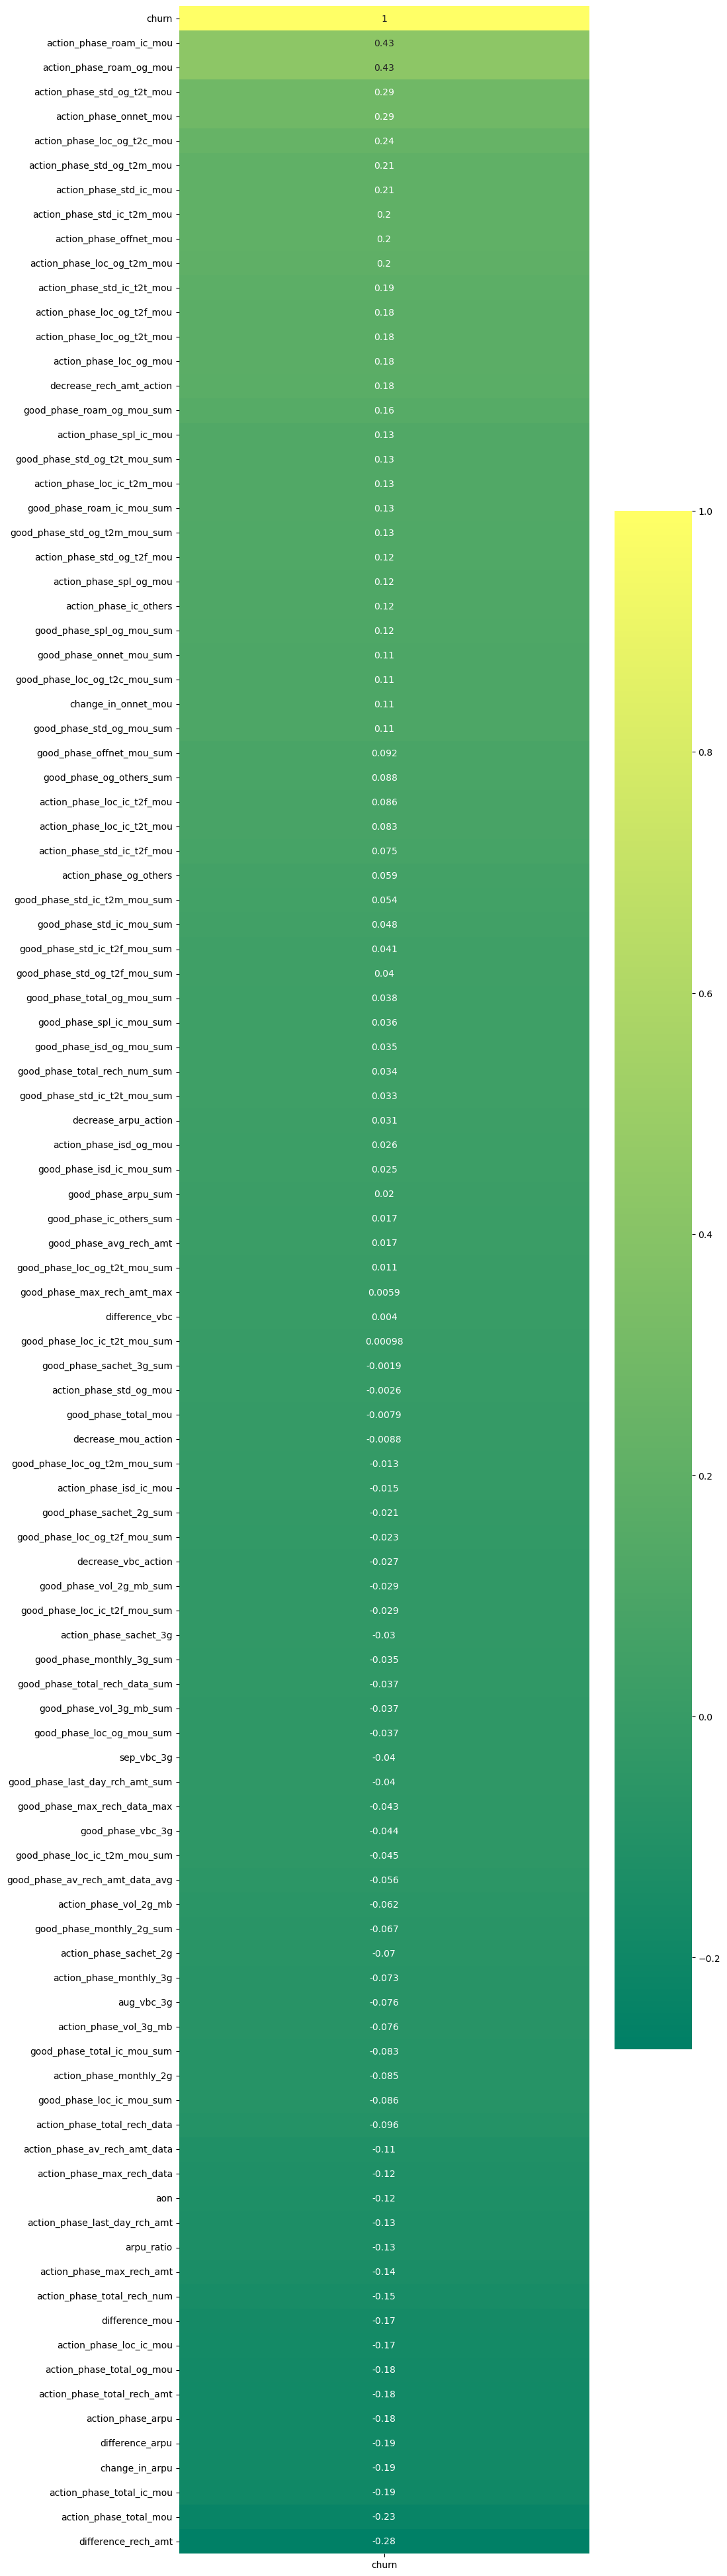

In [109]:
plt.figure(figsize=(10,50))
sns.heatmap(corr_data.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
plt.show()

In [110]:
telecom_data_hv.columns

Index(['mobile_number', 'action_phase_arpu', 'action_phase_onnet_mou',
       'action_phase_offnet_mou', 'action_phase_roam_ic_mou',
       'action_phase_roam_og_mou', 'action_phase_loc_og_t2t_mou',
       'action_phase_loc_og_t2m_mou', 'action_phase_loc_og_t2f_mou',
       'action_phase_loc_og_t2c_mou',
       ...
       'action_phase_total_mou', 'difference_mou', 'decrease_mou_action',
       'change_in_arpu', 'change_in_onnet_mou', 'difference_rech_amt',
       'decrease_rech_amt_action', 'difference_vbc', 'decrease_vbc_action',
       'aon_range'],
      dtype='object', length=106)

In [111]:
col_drop=['aon_range','good_phase_arpu_sum','good_phase_total_mou','difference_mou','difference_rech_amt','good_phase_avg_rech_amt','good_phase_vbc_3g','difference_vbc']

In [112]:
telecom_data_hv.drop(col_drop,axis=1,inplace=True)

In [113]:
telecom_data_hv.isnull().sum()

mobile_number                      0
action_phase_arpu                  0
action_phase_onnet_mou             0
action_phase_offnet_mou            0
action_phase_roam_ic_mou           0
action_phase_roam_og_mou           0
action_phase_loc_og_t2t_mou        0
action_phase_loc_og_t2m_mou        0
action_phase_loc_og_t2f_mou        0
action_phase_loc_og_t2c_mou        0
action_phase_loc_og_mou            0
action_phase_std_og_t2t_mou        0
action_phase_std_og_t2m_mou        0
action_phase_std_og_t2f_mou        0
action_phase_std_og_mou            0
action_phase_isd_og_mou            0
action_phase_spl_og_mou            0
action_phase_og_others             0
action_phase_total_og_mou          0
action_phase_loc_ic_t2t_mou        0
action_phase_loc_ic_t2m_mou        0
action_phase_loc_ic_t2f_mou        0
action_phase_loc_ic_mou            0
action_phase_std_ic_t2t_mou        0
action_phase_std_ic_t2m_mou        0
action_phase_std_ic_t2f_mou        0
action_phase_std_ic_mou            0
a

In [114]:
y=telecom_data_hv['churn'].astype(int)

In [115]:
X = telecom_data_hv.drop(['mobile_number','churn'], axis=1)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [117]:
sm = SMOTE(random_state=27)

In [118]:
y_train=y_train.astype(int)

In [119]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [120]:
scaler = StandardScaler()

In [121]:
X_train = scaler.fit_transform(X_train)

In [122]:
X_test = scaler.transform(X_test)

In [141]:
learner_pca = LogisticRegression()

In [142]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [143]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [146]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

In [152]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head(10)

,churn
29360,0
49979,0
90612,0
87007,0
91852,0
28100,0
69301,0
50905,0
31097,0
83157,1


In [155]:
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train, y_train)
# Predicted probabilities
y_pred = logsk.predict_proba(X_test)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.809561
1,0.661605
2,0.008369
3,0.073811
4,0.009180


In [157]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,churn_Prob
0,0,0,0.809561
1,1,0,0.661605
2,2,0,0.008369
3,3,0,0.073811
4,4,0,0.009180


In [159]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,CustID,churn,churn_Prob,predicted
0,0,0,0.809561,1
1,1,0,0.661605,1
2,2,0,0.008369,0
3,3,0,0.073811,0
4,4,0,0.009180,0


In [161]:
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[5057,  413],
       [ 155,  378]])

In [ ]:
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

In [163]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.9053806430118274

In [164]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

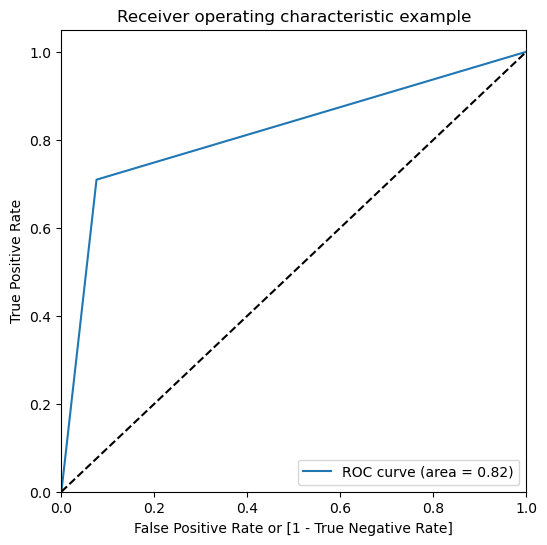

(array([0.        , 0.07550274, 1.        ]),
 array([0.        , 0.70919325, 1.        ]),
 array([inf,  1.,  0.]))

In [166]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [179]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.churn_Prob))

'0.90'

In [180]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [181]:
pca.components_

array([[-3.74461276e-02,  1.93514632e-01,  1.83876939e-01, ...,
         7.77338084e-02,  3.67360221e-02,  4.24353758e-03],
       [ 1.79988144e-01, -8.86502320e-02, -7.42957679e-02, ...,
        -1.10976517e-01, -1.11105139e-01,  1.21684014e-01],
       [ 8.00028560e-02, -6.25600717e-02, -7.02265759e-02, ...,
        -2.56912371e-01, -1.95729322e-02, -1.47408541e-01],
       ...,
       [-5.24304031e-14, -9.20365678e-04,  3.57173215e-16, ...,
         1.02705909e-03,  4.05925293e-16, -3.46944695e-17],
       [ 9.27136899e-16,  5.49875068e-01, -2.70588112e-15, ...,
        -6.13619347e-01,  2.08166817e-17, -5.55111512e-17],
       [-0.00000000e+00, -3.23267509e-02, -4.23923049e-17, ...,
         3.60742302e-02,  7.32920669e-17, -3.81639165e-17]])

In [182]:
pca.explained_variance_ratio_

array([1.97247525e-01, 1.01633578e-01, 7.04809640e-02, 5.51681816e-02,
       5.11155427e-02, 4.05685531e-02, 3.66784477e-02, 2.72136102e-02,
       2.26925382e-02, 2.16931773e-02, 1.92562141e-02, 1.85986003e-02,
       1.63093460e-02, 1.52766234e-02, 1.45746189e-02, 1.33472837e-02,
       1.28782582e-02, 1.27213586e-02, 1.16351974e-02, 1.13284031e-02,
       1.09241004e-02, 1.05478120e-02, 1.02505785e-02, 9.53725228e-03,
       9.00356801e-03, 8.69511910e-03, 8.36161942e-03, 7.97886047e-03,
       7.85543454e-03, 7.49583326e-03, 7.03390856e-03, 6.83950126e-03,
       6.65625584e-03, 6.27494537e-03, 5.85941236e-03, 5.79350815e-03,
       5.43874831e-03, 5.24403835e-03, 5.13681334e-03, 4.76962615e-03,
       4.68036533e-03, 4.34226527e-03, 4.23478777e-03, 4.05826470e-03,
       3.87374049e-03, 3.67907029e-03, 3.59607396e-03, 3.31109737e-03,
       3.15948685e-03, 3.11366946e-03, 2.95745193e-03, 2.82635963e-03,
       2.67127936e-03, 2.59381343e-03, 2.45139833e-03, 2.30117738e-03,
      

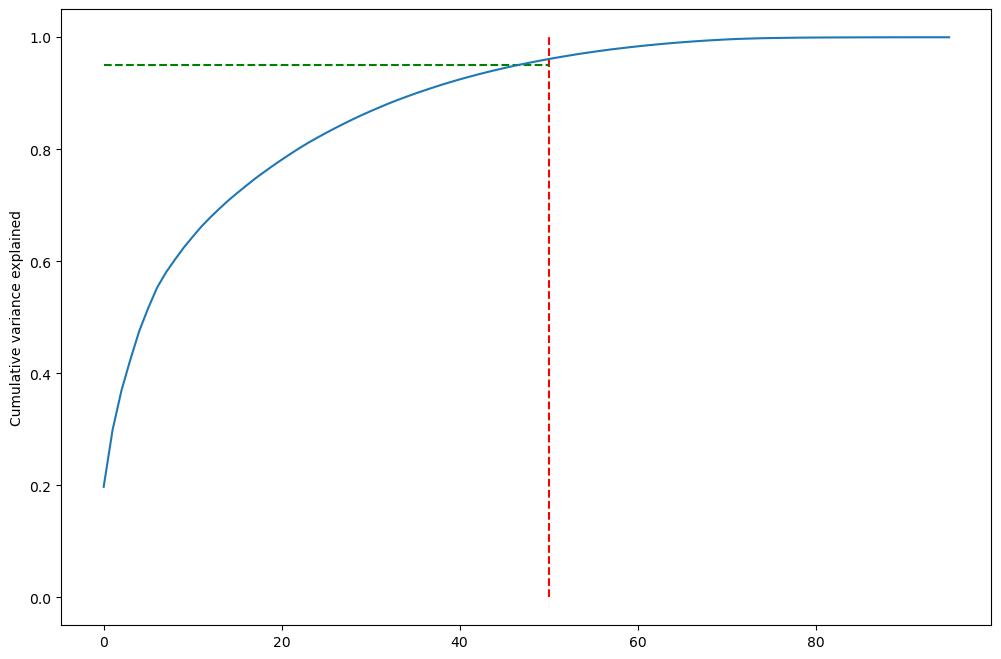

In [198]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=50, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [200]:
pca_final = IncrementalPCA(n_components=16)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(43896, 16)

In [201]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(16, 16)

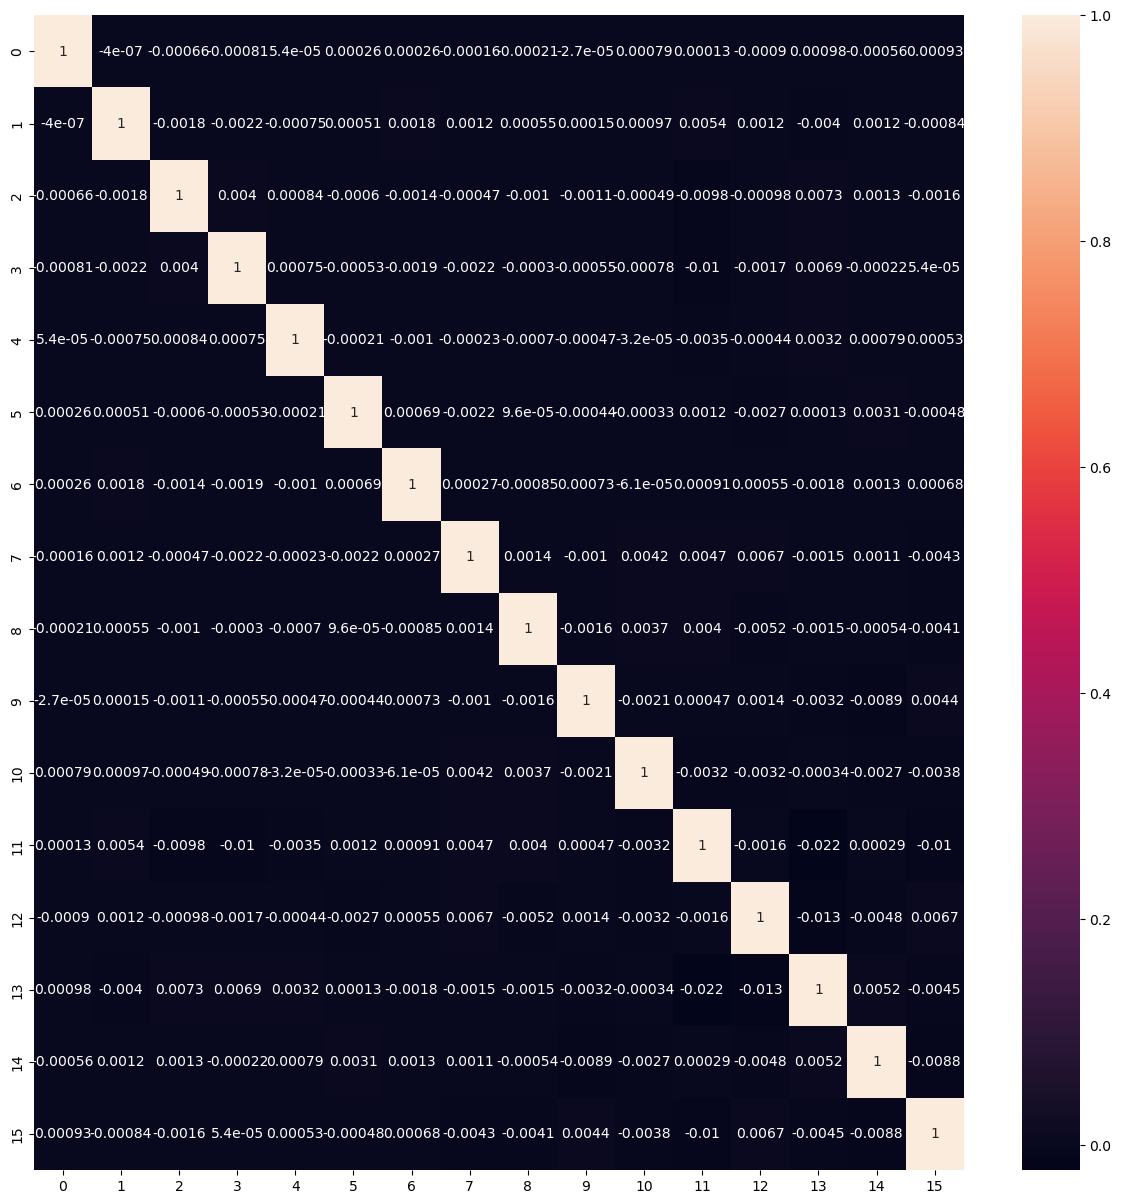

In [202]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)
plt.show()

In [203]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(6003, 16)

In [204]:
learner_pca = LogisticRegression()

In [205]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [206]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [207]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

In [213]:
y_pred = model_pca.predict(df_test_pca)

In [250]:
confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.predicted)
confusion

array([[5057,  413],
       [ 155,  378]])

In [251]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [252]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7091932457786116

In [253]:
# Let us calculate specificity
TN / float(TN+FP)

0.9244972577696526

In [254]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07550274223034735


In [255]:
# positive predictive value 
print (TP / float(TP+FP))

0.4778761061946903


In [256]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9702609363008442


In [231]:
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.9053806430118274

In [234]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,CustID,churn,churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0.809561,1,1,1,1,1,1,1,1,1,1,0
1,1,0,0.661605,1,1,1,1,1,1,1,1,0,0,0
2,2,0,0.008369,0,1,0,0,0,0,0,0,0,0,0
3,3,0,0.073811,0,1,0,0,0,0,0,0,0,0,0
4,4,0,0.009180,0,1,0,0,0,0,0,0,0,0,0


In [237]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.088789  1.000000  0.000000
0.1   0.1  0.647343  0.904315  0.622303
0.2   0.2  0.758954  0.868668  0.748263
0.3   0.3  0.822922  0.823640  0.822852
0.4   0.4  0.873230  0.763602  0.883912
0.5   0.5  0.905381  0.709193  0.924497
0.6   0.6  0.921706  0.639775  0.949177
0.7   0.7  0.931034  0.574109  0.965814
0.8   0.8  0.936199  0.461538  0.982450
0.9   0.9  0.933533  0.324578  0.992870


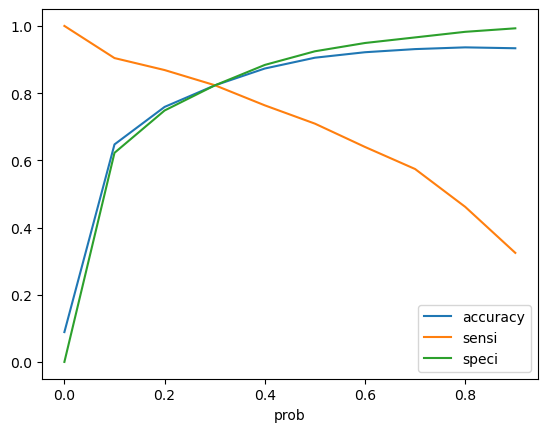

In [238]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [242]:
y_pred_final['final_predicted'] = y_pred_final.churn_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,CustID,churn,churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0,0.809561,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0,0.661605,1,1,1,1,1,1,1,1,0,0,0,1
2,2,0,0.008369,0,1,0,0,0,0,0,0,0,0,0,0
3,3,0,0.073811,0,1,0,0,0,0,0,0,0,0,0,0
4,4,0,0.009180,0,1,0,0,0,0,0,0,0,0,0,0


In [243]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8229218723971348

In [246]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[4501,  969],
       [  94,  439]])

In [247]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [248]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8236397748592871

In [249]:
# Let us calculate specificity
TN / float(TN+FP)

0.8228519195612432

In [257]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07550274223034735


In [258]:
# Positive predictive value 
print (TP / float(TP+FP))

0.4778761061946903


In [259]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9702609363008442


In [260]:
from sklearn.metrics import precision_recall_curve

In [262]:
p, r, thresholds = precision_recall_curve(y_pred_final.churn, y_pred_final.churn_Prob)

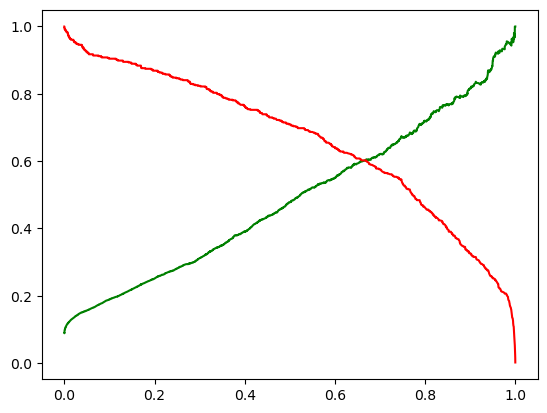

In [263]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Using Decision Trees

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [265]:
X_train.shape, X_test.shape

((21007, 96), (9004, 96))

In [266]:
from sklearn.tree import DecisionTreeClassifier

In [267]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [268]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [269]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [270]:
from sklearn.metrics import classification_report

In [271]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8234
           1       0.76      0.50      0.60       770

    accuracy                           0.94      9004
   macro avg       0.86      0.74      0.78      9004
weighted avg       0.94      0.94      0.94      9004



In [272]:
from sklearn.metrics import RocCurveDisplay

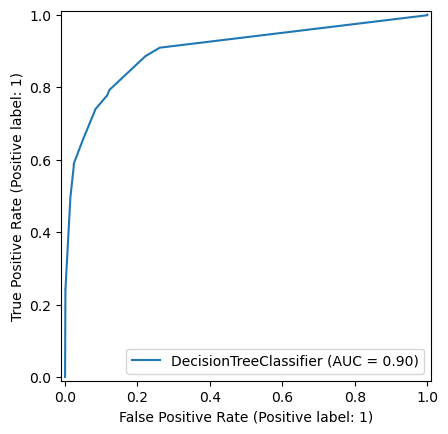

In [273]:
RocCurveDisplay.from_estimator(dt_base, X_test, y_test)

# Show the plot
plt.show()

In [274]:
from sklearn.model_selection import GridSearchCV

In [275]:
dt = DecisionTreeClassifier(random_state=42)

In [276]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [277]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [278]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: user 1.4 s, sys: 1.89 s, total: 3.3 s
Wall time: 26 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [280]:
grid_search.best_score_

0.9392583329791895

In [281]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)

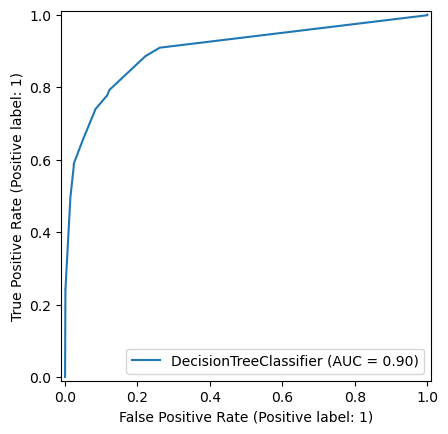

In [282]:
RocCurveDisplay.from_estimator(dt_base, X_test, y_test)
plt.show()

### Using Random Forest

In [283]:
from sklearn.ensemble import RandomForestClassifier

In [284]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [285]:
%%time
rf.fit(X_train, y_train)

CPU times: user 216 ms, sys: 34.5 ms, total: 250 ms
Wall time: 276 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [286]:
rf.oob_score_

0.9369257866425478

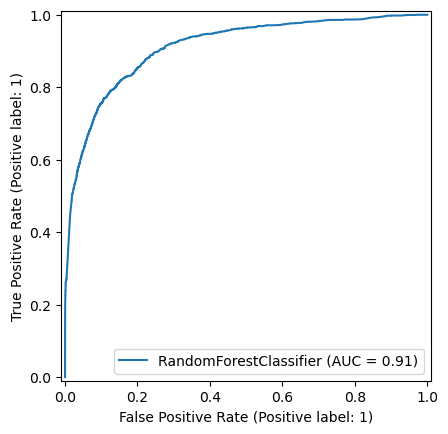

In [287]:
RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [288]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [289]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [290]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [291]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: user 10.3 s, sys: 7.16 s, total: 17.4 s
Wall time: 2min 58s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [292]:
grid_search.best_score_

0.9400675666463559

In [293]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

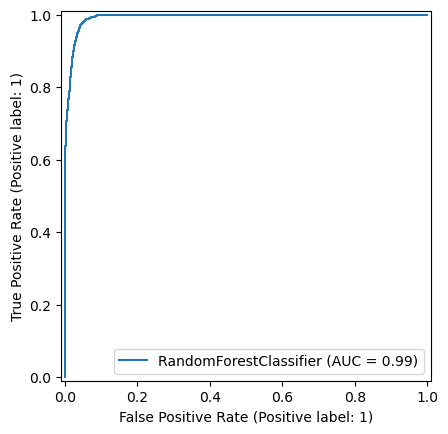

In [294]:
RocCurveDisplay.from_estimator(rf_best, X_train, y_train)
plt.show()

In [295]:
rf_best.feature_importances_

array([3.35912805e-02, 2.73072355e-02, 2.00534266e-02, 3.74487259e-02,
       3.43128954e-02, 1.37522356e-02, 1.30202457e-02, 1.09873278e-02,
       2.53870279e-03, 2.02863126e-02, 2.41596962e-02, 6.37370784e-03,
       9.22492764e-04, 8.14285062e-03, 1.84671272e-03, 3.08410696e-03,
       1.12726534e-03, 6.06922214e-02, 1.00865278e-02, 2.02793865e-02,
       4.38246682e-03, 2.44614794e-02, 8.91270657e-03, 9.27838202e-03,
       1.26274619e-03, 1.31860501e-02, 7.98861828e-02, 7.75398946e-03,
       3.73127408e-03, 3.01924041e-03, 4.48548997e-03, 2.26945272e-02,
       4.21709213e-02, 1.69274623e-02, 6.33819273e-03, 5.63992319e-03,
       7.42403242e-03, 3.67758321e-03, 2.99591924e-03, 1.80593762e-04,
       4.40983235e-04, 6.43507508e-04, 5.40448813e-05, 1.12741315e-02,
       1.85103323e-03, 1.87802540e-04, 6.95968834e-03, 7.18442840e-03,
       8.28261838e-03, 9.25390947e-03, 8.53051620e-03, 7.73304950e-03,
       5.28264852e-03, 4.41764190e-03, 7.55268387e-03, 7.83227012e-03,
      

In [296]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [297]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
26,action_phase_total_ic_mou,0.079886
90,action_phase_total_mou,0.066405
17,action_phase_total_og_mou,0.060692
32,action_phase_max_rech_amt,0.042171
87,arpu_ratio,0.040704
3,action_phase_roam_ic_mou,0.037449
4,action_phase_roam_og_mou,0.034313
0,action_phase_arpu,0.033591
1,action_phase_onnet_mou,0.027307
21,action_phase_loc_ic_mou,0.024461
